# Library

In [40]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)

# Data

In [ ]:
df = pd.read_csv("Data/iris.csv")

In [13]:
# Let's see the iris data content
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# Let's see the summary statistics of the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [19]:
# Let's see what is unique with the target label
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

# Visualization

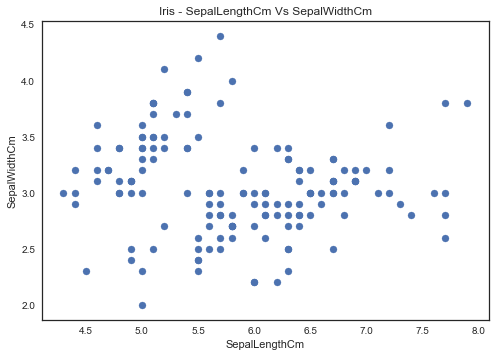

In [25]:
# Scatter Plot
plt.scatter(x = df['SepalLengthCm'], y = df['SepalWidthCm'])
plt.title('Iris - SepalLengthCm Vs SepalWidthCm')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

Text(0,0.5,'SepalWidthCm')

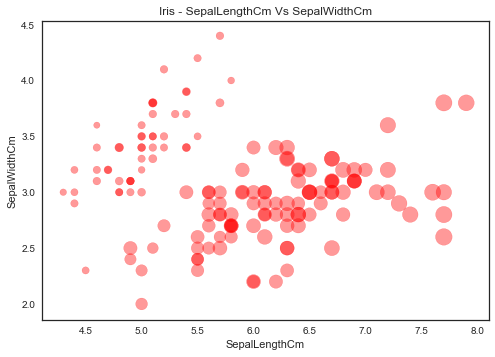

In [44]:
# Bubble Plot

x = df['SepalLengthCm']
y = df['SepalWidthCm']
z = df['PetalLengthCm']

plt.scatter(x, y, s=z*40, c="red", alpha=0.4)
plt.title('Iris - SepalLengthCm Vs SepalWidthCm')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')

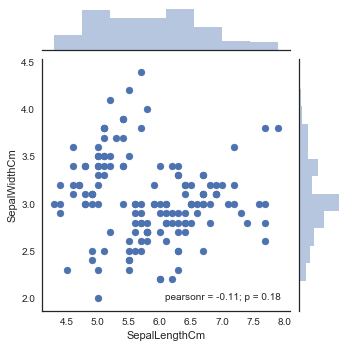

In [41]:
# Joint Plot
plt.close()
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

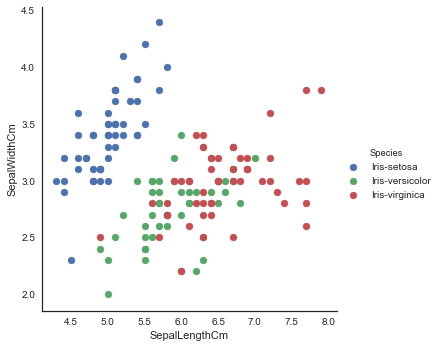

In [48]:
# One piece of information missing in the plots above is what species each plant is
# We can use seaborn's FacetGrid to color the scatterplot by species

FacetGrid = sns.FacetGrid(df, hue="Species", size=5)
FacetGrid.map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

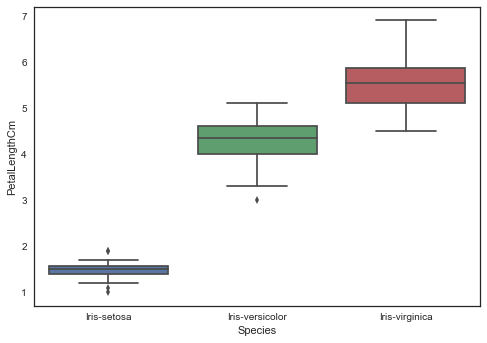

In [49]:
# We can look at an individual feature in Seaborn through a boxplot

sns.boxplot(x="Species", y="PetalLengthCm", data=df)

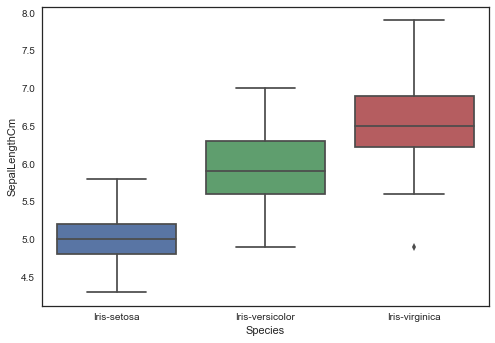

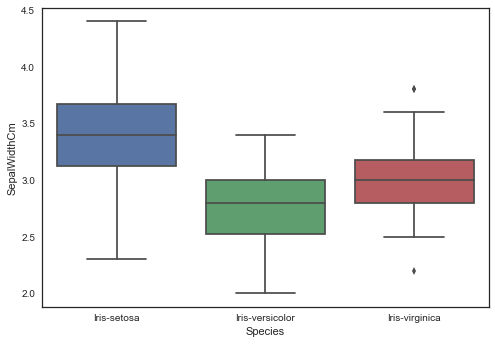

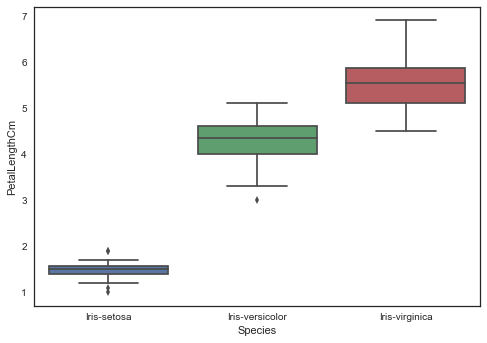

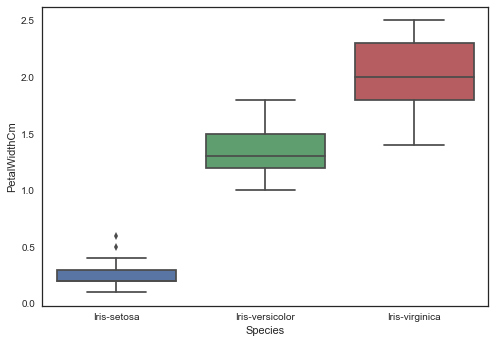

In [74]:
# We can also see all by looping it by looping it

numeric_feature = df.select_dtypes(include=[np.float64]).columns

for i in numeric_feature:
    plt.close()
    sns.boxplot(x= "Species", y= i, data= df)
    plt.show()

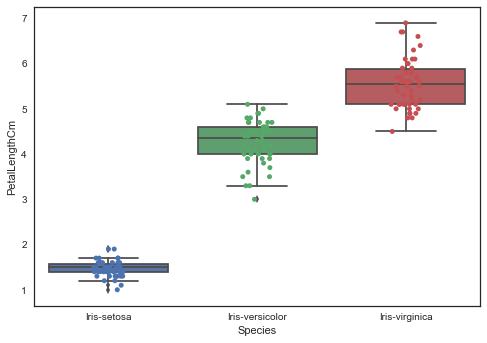

In [75]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species

# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=df)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True, edgecolor="gray")

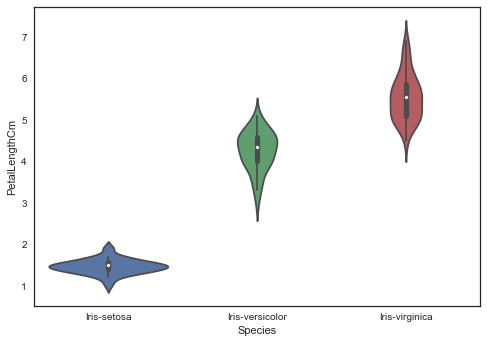

In [76]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot

sns.violinplot(x="Species", y="PetalLengthCm", data=df, size=6)

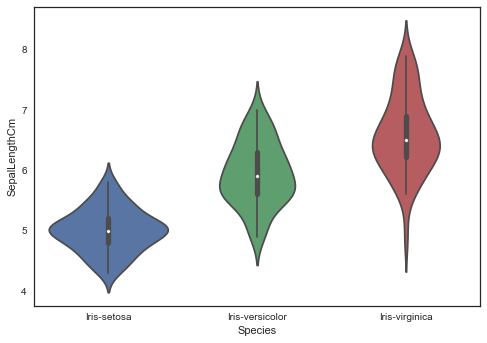

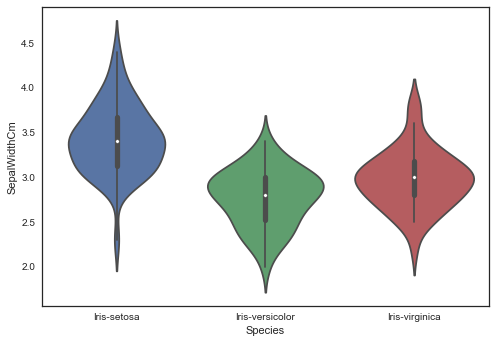

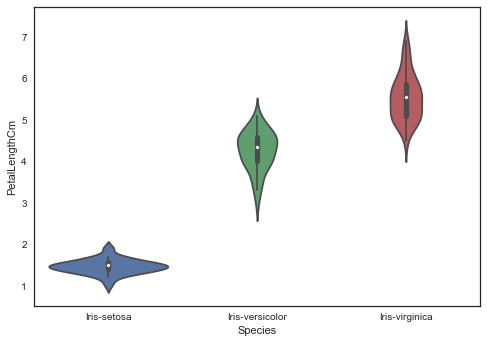

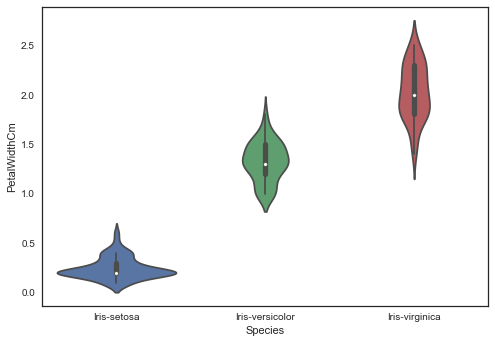

In [77]:
# We can also see all by looping it by looping it

numeric_feature = df.select_dtypes(include=[np.float64]).columns

for i in numeric_feature:
    plt.close()
    sns.violinplot(x="Species", y=i, data=df, size=6)
    plt.show()

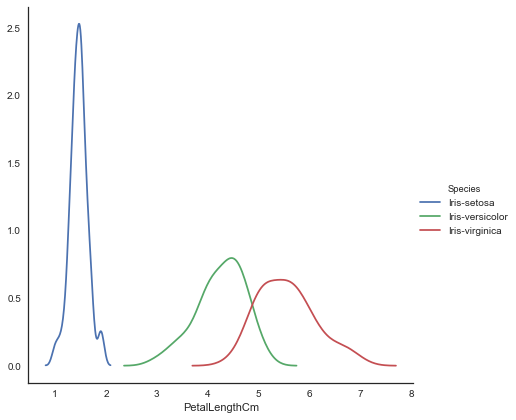

In [78]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature

sns.FacetGrid(df, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

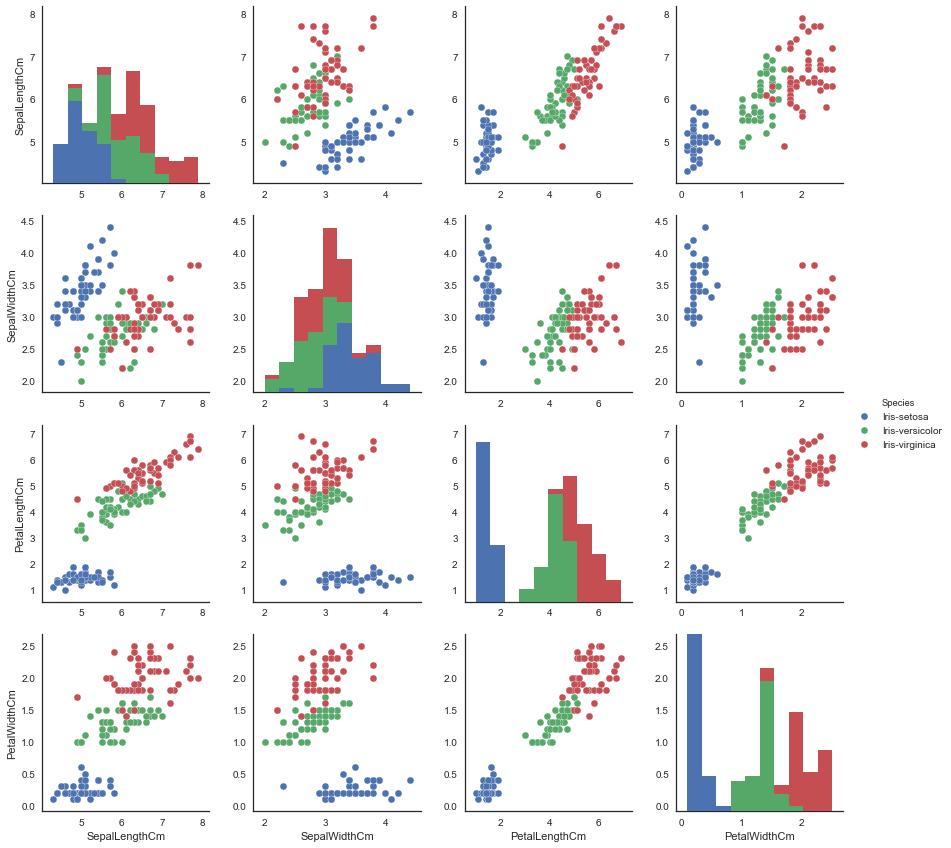

In [80]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features

# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations

sns.pairplot(df.drop("Id", axis=1), hue="Species", size=3)

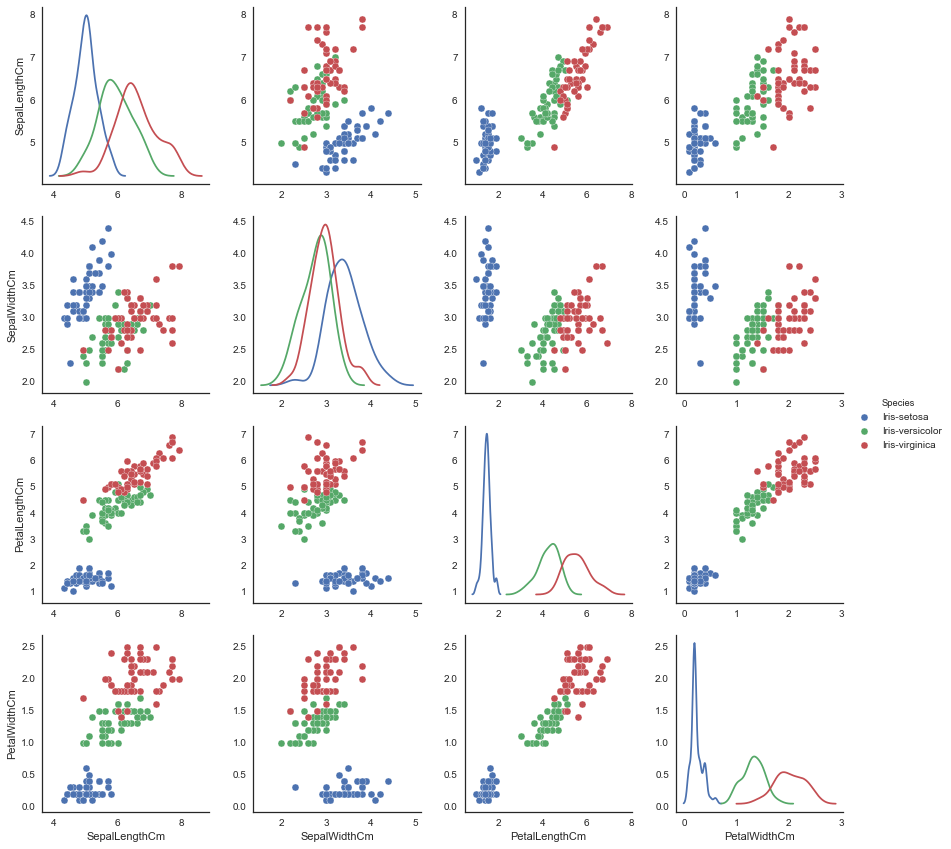

In [81]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde

sns.pairplot(df.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E315EAFB70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E31669B2E8>]], dtype=object)

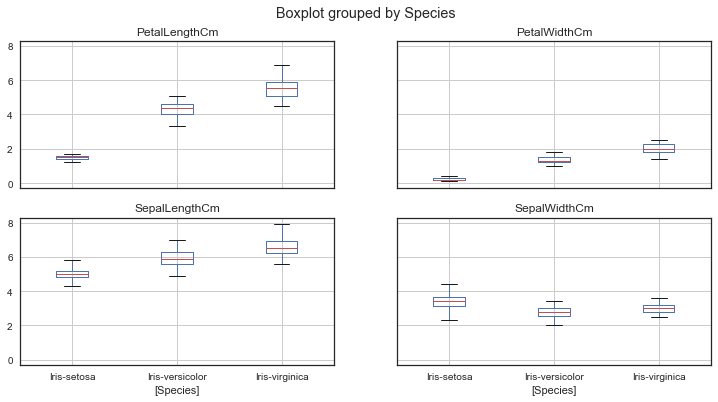

In [82]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species

df.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

C:\Users\eljir\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.andrews_curves' is deprecated, import 'pandas.plotting.andrews_curves' instead.
  


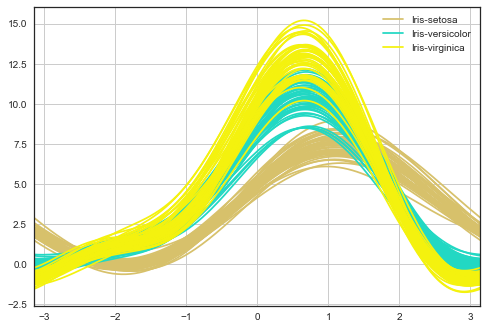

In [83]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these

from pandas.tools.plotting import andrews_curves
andrews_curves(df.drop("Id", axis=1), "Species")

C:\Users\eljir\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


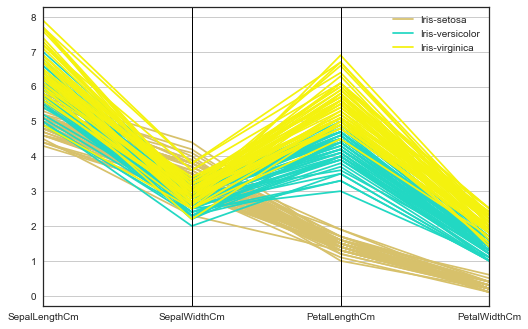

In [84]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample

from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(df.drop("Id", axis=1), "Species")

C:\Users\eljir\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'pandas.tools.plotting.radviz' is deprecated, import 'pandas.plotting.radviz' instead.
  import sys


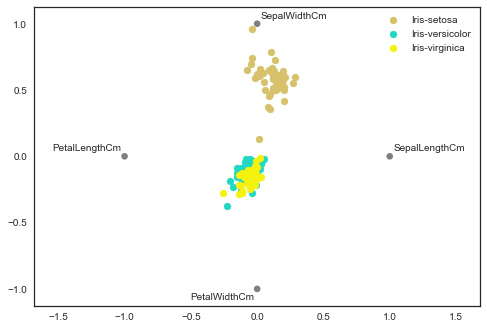

In [88]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature

from pandas.tools.plotting import radviz
radviz(df.drop("Id", axis=1), "Species")